# 트리의 앙상블
* 앙상블: 여러 개 모델 훈련하는 머신러닝 알고리즘
  * 더 좋은 예측 결과를 만들기 위함
* 랜덤 포레스트: 결정 트리 기반의 앙상블 학습 방법
  * 결정 트리를 여러 개 만듦
  * 부트스트랩 샘플 사용 ➡ 일부 특성 선택 후 트리 생성
* 엑스트라 트리: 결정 트리의 노드를 랜덤하게 분할
  * 최적의 노드 선택 후 트리 구성 (랜덤)
* 그레디언트 부스팅: 결정 트리를 연속적으로 추가
  * 앙상블에서 가장 많이 사용하는 방법
  * 이전 트리의 손실을 보완하는 식으로 손실 함수를 최소화
  * 얕은 결정 트리를 연속해 추가
  * 훈련 속도가 조금 느리지만 더 좋은 성능
* 히스토그램 기반 그레디언트 부스팅: 356개 정수 구간으로 훈련 데이터를 나누어 빠르게 높은 성능을 냄

### RandomForestClassifier
* 랜덤 포레스트 분류 클래스

### ExtraTreeClassifier
* 엑스트라 트리 분류 클래스

### GradientBoostingClassifier
* 그레디언트 부스팅 분류 클래스

### HistGraidentBoostingClassifier  
* 히스토그램 기반 그레디언트 부스팅 분류 클래스


## 1️⃣ 랜덤포레스트
* **부트스트랩 샘플**을 사용해 훈련 데이터를 만듦
  * how? 데이터셋에서 무작위(random)로 n개의 데이터를 선택 ➡ 중복 허용
  * 샘플링: 데이터 추출 (훈련에서 new 훈련데이터 추출)
* 여러 무리의 결정 트리를 종합해 최선의 결과를 도출
* 여러 개의 결정 트리를 만들고, 만들어진 결정 트리들의 결과를 모아 다수결로 최종 결과를 도출하는 알고리즘
  * why? 두 개만 만들고 한다면 한 쪽으로 치우지는 편향된 결과가 나올 수 있기 때문


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine-date')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy() # 훈련
target = wine['class'].to_numpy() # 정답

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [2]:
from sklearn.model_selection import cross_validate # 교차 검증
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 클래스

In [3]:
rf = RandomForestClassifier(n_jobs= -1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1) #n_jobs = CPU 병렬
# scores 변수에 교차 검증 결과가 저장
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


`n_jobs` :  모델을 학습하거나 예측할 때 사용할 CPU 코어의 수를 지정하는 매개변수
  * -1 : 컴퓨터에 있는 모든 CPU 코어를 사용하여 작업을 최대한 빠르게 처리
  * 1 : 단일 코어
  * 2 : 두 개의 코어

`scores`를 교차 검증함
* 각 폴드(fold)마다의 훈련 세트와 검증 세트의 성능 지표가 포함
* scores['train_score']에는 훈련 세트의 점수가, scores['test_score']에는 검증 세트의 점수가 저장

In [4]:
# 특성의 중요도 체크
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


[알콜  설탕  pH]

설탕 > pH > 알콜 순으로 중요하게 고려되었음

In [5]:
# 랜덤 포레스트 성능 평가 oob(out of bag: 부트스트랩에 포함되지 않은 샘플을 사용해 모델 평가)
# False: 부트스트랩 한 샘플로 훈련
# True: 안 들어간 샘플로 훈련
rf = RandomForestClassifier(oob_score=True, n_jobs= -1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


# 2️⃣ 엑스트라 트리
* 랜덤 포레스트와 비슷함
  * 전체 특성 중 일부 특성(노드)을 랜덤하게 추출
* 노드를 랜덤하게 뽑아냄 == 특성을 뽑아냄 == 중복 불허용
* 추출된 노드를 기준으로 트리 구성

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs= -1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1) #n_jobs = CPU 병렬
# scores 변수에 교차 검증 결과가 저장
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

et.fit(train_input, train_target)
print(et.feature_importances_)

0.9974503966084433 0.8887848893166506
[0.20183568 0.52242907 0.27573525]


## 3️⃣ 그레이디언트 부스팅
* max 어쩌구가 얕은 상태
* 순차적으로 트리를 구성
* 얕은 결정 트리를 사용해 트리의 오차를 보완하는 방식
* 랜덤이나 엑스트라보다 성능이 高
* 경사 하강법 + 트리 앙상블 접목
* 결정 트리를 계속 추가하면서 가장 낮은 곳을 찾아 이동

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015
0.9464595437171814 0.8780082549788999


`GradientBoostingClassifier` 추가적으로 넣을 수 있는 파라미터
1. loss 손실 함수 지정 (ex. 로지스탁손실함수=평균제곱오차)
2. learning_rate 학습 속도 제한
3. subsample  훈련 샘플 비율

In [11]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15887763 0.6799705  0.16115187]


## 4️⃣ 히스토그램 기반 부스팅
* 정형 데이터를 다루는 머신러닝 알고리즘 중 가장 인기가 많은 알고리즘
* 입력 특성을 **256**개의 구간으로 나눔
  * 255개 + 여유분 1개
* 노드를 분할 할 때 최적의 분할을 매우 빠르게 찾을 수 있음

== 특성(알콜, 설탕, pH)를 256개의 구간으로 나누고, 255개는 입력 데이터로 1개는 누락 데이터(여유분)로 나뉨

In [13]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


1. learning_rate : 학습 속도 제한
2. max_iter : 부스팅 단계의 트리 개수
3. max_bins : 구간 갯수 (256 => 255 디폴트 입력 데이터 + 1 누락 데이터)

* 여기서는 중요도를 구하는 함수를 사용하지 않고 있음
  * 지원하지 않음
  * 대신해서 `Permutattion Importance` 使 (p12)
    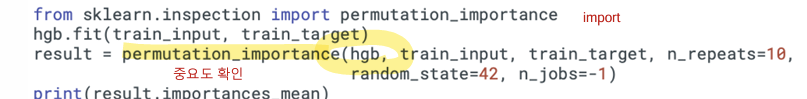

#### XGBoost
* 그레디언트 부스팅 기반
* XGBClassifier 클래스

#### LightGBM
* LGBMClassifier 클래스